In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
from datetime import datetime

In [ ]:
user_course = pd.read_csv("/kaggle/input/final-user-problem-train/grouped_lists.csv")
user_course

,user_id_,course_id_,exercise_id,is_correct_sum,is_correct_count,is_correct_mean,is_correct_list,attempts_sum,attempts_mean,attempts_list,...,submit_time_diff_hours,submit_hours_unique,percentage_correct,percentage_score,problem_count,problem_sum,is_completed,percentage_completed,percentage_correct_completed,percentage_score_completed
0,U_10000,C_2033958,Ex_7007033,1,7,0.142857,"[0, 0, 1, 0, 0, 0, 0]",7,1.0,"[1, 1, 1, 1, 1, 1, 1]",...,0.073611,"[10, 10, 10, 10, 10, 10, 10]",0.142857,0.090909,8,14.0,0,0.875000,0.125000,0.071429
1,U_1000454,C_2199449,Ex_7396062,3,3,1.000000,"[1, 1, 1]",3,1.0,"[1, 1, 1]",...,0.007500,"[21, 21, 21]",1.000000,1.000000,10,0.0,0,0.300000,0.300000,0.300000
2,U_1000979,C_947149,Ex_1431533,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.002778,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
3,U_1000979,C_947149,Ex_1431535,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.016111,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
4,U_1000979,C_947149,Ex_1431537,5,5,1.000000,"[1, 1, 1, 1, 1]",5,1.0,"[1, 1, 1, 1, 1]",...,0.018889,"[14, 14, 14, 14, 14]",1.000000,1.000000,5,4.0,1,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036019,U_99772,C_1903985,Ex_6179341,34,40,0.850000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,128.621389,"[15, 15, 21, 15, 20, 15, 17, 17, 23, 23, 23, 2...",0.850000,0.833333,45,110.0,0,0.888889,0.755556,0.454545
2036020,U_99772,C_1903985,Ex_6179343,16,20,0.800000,"[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",20,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,455.118889,"[23, 14, 1, 20, 15, 15, 22, 19, 23, 23, 23, 23...",0.800000,0.800000,23,60.0,0,0.869565,0.695652,0.400000
2036021,U_99772,C_1903985,Ex_6179345,8,10,0.800000,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 0]",10,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,70.933333,"[22, 16, 0, 17, 22, 16, 23, 23, 17, 23]",0.800000,0.733333,12,35.0,0,0.833333,0.666667,0.314286
2036022,U_99772,C_1903985,Ex_6179347,6,6,1.000000,"[1, 1, 1, 1, 1, 1]",6,1.0,"[1, 1, 1, 1, 1, 1]",...,13.814444,"[0, 14, 14, 14, 0, 0]",1.000000,1.000000,8,27.0,0,0.750000,0.750000,0.259259


In [ ]:
course_exam = pd.DataFrame()
course_exam['course_id']= user_course['course_id_'].unique()
course_exam

,course_id
0,C_2033958
1,C_2199449
2,C_947149
3,C_735164
4,C_1756056
...,...
869,C_682390
870,C_697113
871,C_681488
872,C_1886691


In [ ]:
course_info = pd.read_json("/kaggle/input/lightmooccubex/entities/course.json", lines = True)
course_info

,id,name,field,prerequisites,about,resource
0,C_584313,《资治通鉴》导读,"[历史学, 中国语言文学]",,通过老师导读，同学们可深入这一经典文本内部，得以纵览千年历史，提升国学素养，体味人生智慧。,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,微积分——极限理论与一元函数,"[应用经济学, 数学, 物理学, 理论经济学]",,本课程是理工科的一门数学基础课，系统、全面地介绍了一元函数微积分学。课程既保持了数学的严谨和...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,新闻摄影,"[艺术学, 新闻传播学]",,掌握基本的摄影技能，了解图片新闻的工作方式，训练对生活的观察和热爱，发展对图像的审美和批评能...,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,数据挖掘：理论与算法,[计算机科学与技术],,最有趣的理论+最有用的算法=不得不学的数据科学。,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,大学计算机,[],,大学计算机课程将以计算思维为导向，以计算机原理、概念为基础，以新技术新方法为牵引，以创新思维...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
...,...,...,...,...,...,...
3776,C_2338076,（疾风计划）软件工程,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第1章 初识软件工程 ', '1.1 软件无处不在 ', '讲课..."
3777,C_2341259,（疾风计划）面向对象程序设计（C++）,[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',..."
3778,C_2337996,（疾风计划）数据结构(下),[],,疾风计划2021【首期限额招募】进行中\n名校名师丨专属助教丨专业认证丨系统全面丨修炼内功丨...,"[{'titles': ['第零章 ', '选课之前', '宣传片'], 'resourc..."
3779,C_1945689,机器学习训练营,[],,清华张敏老师带你12周掌握机器学习！8大经典算法 +7大实训 + 直播点评 + 博士助教+云...,"[{'titles': ['序-开营仪式及学习课件', None, '1.1_初识机器学习'..."


In [ ]:
course_info = course_info[['id', 'resource']]
course_info

,id,resource
0,C_584313,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
...,...,...
3776,C_2338076,"[{'titles': ['第1章 初识软件工程 ', '1.1 软件无处不在 ', '讲课..."
3777,C_2341259,"[{'titles': ['第一讲 课程简介与编程环境', '1.0 课程定位、教学内容',..."
3778,C_2337996,"[{'titles': ['第零章 ', '选课之前', '宣传片'], 'resourc..."
3779,C_1945689,"[{'titles': ['序-开营仪式及学习课件', None, '1.1_初识机器学习'..."


In [ ]:
course_exploded = course_info.explode('resource', ignore_index=True)
course_exploded

,id,resource
0,C_584313,"{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'resou..."
1,C_584313,"{'titles': ['第一课 导论与三家分晋', '智伯的覆亡', '智伯的覆亡'], ..."
2,C_584313,"{'titles': ['第一课 导论与三家分晋', '智伯悲剧的反思', '智伯的覆亡讨论..."
3,C_584313,"{'titles': ['第一课 导论与三家分晋', None, '第一课 导论与三家分晋-..."
4,C_584313,"{'titles': ['第二课 战国前期的政治', '魏文侯治国', '魏文侯治国'], ..."
...,...,...
271038,C_2329163,"{'titles': ['第四章 红色之旅实践写作', '4.16 求职简历', '4...."
271039,C_2329163,"{'titles': ['第四章 红色之旅实践写作', '4.16 求职简历', '求职..."
271040,C_2329163,"{'titles': ['第四章 红色之旅实践写作', '4.17 实践—演讲稿', '..."
271041,C_2329163,"{'titles': ['第四章 红色之旅实践写作', '4.18 延安保育院观后感',..."


In [ ]:
resource_details = pd.json_normalize(course_exploded['resource'])
resource_details

,titles,resource_id,chapter
0,"[第一课 导论与三家分晋, 导论, 导论]",V_849,1.1.1
1,"[第一课 导论与三家分晋, 智伯的覆亡, 智伯的覆亡]",V_850,1.2.1
2,"[第一课 导论与三家分晋, 智伯悲剧的反思, 智伯的覆亡讨论]",V_851,1.3.1
3,"[第一课 导论与三家分晋, None, 第一课 导论与三家分晋--习题]",Ex_856,1.4
4,"[第二课 战国前期的政治, 魏文侯治国, 魏文侯治国]",V_857,2.1.1
...,...,...,...
271038,"[第四章 红色之旅实践写作, 4.16 求职简历, 4.16 求职简历]",V_8630134,3.15
271039,"[第四章 红色之旅实践写作, 4.16 求职简历, 求职简历作业]",Ex_8638642,3.15.1
271040,"[第四章 红色之旅实践写作, 4.17 实践—演讲稿, 4.17 实践—演讲稿]",V_8630135,3.16
271041,"[第四章 红色之旅实践写作, 4.18 延安保育院观后感, 4.18 延安保育院观后感]",V_8630136,3.17


In [ ]:
# Bước 3: gộp lại với cột id
df_final = pd.concat([course_exploded['id'], resource_details], axis=1)

df_final

,id,titles,resource_id,chapter
0,C_584313,"[第一课 导论与三家分晋, 导论, 导论]",V_849,1.1.1
1,C_584313,"[第一课 导论与三家分晋, 智伯的覆亡, 智伯的覆亡]",V_850,1.2.1
2,C_584313,"[第一课 导论与三家分晋, 智伯悲剧的反思, 智伯的覆亡讨论]",V_851,1.3.1
3,C_584313,"[第一课 导论与三家分晋, None, 第一课 导论与三家分晋--习题]",Ex_856,1.4
4,C_584313,"[第二课 战国前期的政治, 魏文侯治国, 魏文侯治国]",V_857,2.1.1
...,...,...,...,...
271038,C_2329163,"[第四章 红色之旅实践写作, 4.16 求职简历, 4.16 求职简历]",V_8630134,3.15
271039,C_2329163,"[第四章 红色之旅实践写作, 4.16 求职简历, 求职简历作业]",Ex_8638642,3.15.1
271040,C_2329163,"[第四章 红色之旅实践写作, 4.17 实践—演讲稿, 4.17 实践—演讲稿]",V_8630135,3.16
271041,C_2329163,"[第四章 红色之旅实践写作, 4.18 延安保育院观后感, 4.18 延安保育院观后感]",V_8630136,3.17


In [ ]:
def contains_exam_keyword(titles):
    keywords = ['final exam', 'midterm exam', '期中考试', '期末考试', '结课考试']
    return any(
        title and any(kw in title.lower() if isinstance(title, str) else False for kw in keywords)
        for title in titles
    )
# Lọc các dòng thỏa mãn điều kiện
exam_related = df_final[df_final['titles'].apply(contains_exam_keyword)]

# Xem kết quả
exam_related

,id,titles,resource_id,chapter
4674,C_676642,"[期末考试, None, 期末考试-判断题]",Ex_5458293,11.3
5834,C_676664,"[《大国航母与舰载机》期末考试题, None, 一、填空题]",Ex_581330,10.1
5835,C_676664,"[《大国航母与舰载机》期末考试题, None, 二、单选题]",Ex_581331,10.2
5836,C_676664,"[《大国航母与舰载机》期末考试题, None, 三、多选题]",Ex_581534,10.3
5837,C_676664,"[《大国航母与舰载机》期末考试题, None, 四、判断题]",Ex_581535,10.4
...,...,...,...,...
262457,C_2316362,"[期末考试, None, 期末考试--期末考试Part3]",Ex_8530777,12.5
263873,C_2328495,"[Step10 Final Exam, 10.1 Guidance: Reviews of ...",V_8621887,10
265816,C_2333035,"[期末考试, None, 课程考试--作业]",Ex_8676612,14.2
270465,C_2338076,"[第15章 期末考试与总结, None, 第一部分：基础知识]",Ex_8729369,15.2


In [ ]:
ex_exam_related = exam_related[exam_related['resource_id'].str.startswith('Ex_')]
ex_exam_related

,id,titles,resource_id,chapter
4674,C_676642,"[期末考试, None, 期末考试-判断题]",Ex_5458293,11.3
5834,C_676664,"[《大国航母与舰载机》期末考试题, None, 一、填空题]",Ex_581330,10.1
5835,C_676664,"[《大国航母与舰载机》期末考试题, None, 二、单选题]",Ex_581331,10.2
5836,C_676664,"[《大国航母与舰载机》期末考试题, None, 三、多选题]",Ex_581534,10.3
5837,C_676664,"[《大国航母与舰载机》期末考试题, None, 四、判断题]",Ex_581535,10.4
...,...,...,...,...
262456,C_2316362,"[期末考试, None, 期末考试--期末考试Part2]",Ex_8530776,12.3
262457,C_2316362,"[期末考试, None, 期末考试--期末考试Part3]",Ex_8530777,12.5
265816,C_2333035,"[期末考试, None, 课程考试--作业]",Ex_8676612,14.2
270465,C_2338076,"[第15章 期末考试与总结, None, 第一部分：基础知识]",Ex_8729369,15.2


In [ ]:
ex_exam_related[ex_exam_related['id']=='C_1073350']

,id,titles,resource_id,chapter
171137,C_1073350,"[期末考试, None, 测试互评]",Ex_1650729,3
171138,C_1073350,"[期末考试, None, 填空题]",Ex_1650730,3.1


In [ ]:
grouped = ex_exam_related.groupby('id').apply(
    lambda g: list(zip(g['resource_id'], g['chapter']))
).reset_index(name='exam_resources')

grouped

/tmp/ipykernel_13/3125399789.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = ex_exam_related.groupby('id').apply(


,id,exam_resources
0,C_1073350,"[(Ex_1650729, 3), (Ex_1650730, 3.1)]"
1,C_1714443,"[(Ex_3625291, 11.1)]"
2,C_1718815,"[(Ex_4974697, 17.1)]"
3,C_1721804,"[(Ex_3742687, 3), (Ex_3742688, 3.1)]"
4,C_1724283,"[(Ex_3800298, 6.1)]"
...,...,...
373,C_948114,"[(Ex_1467099, 5), (Ex_1573116, 5.1), (Ex_15731..."
374,C_948123,"[(Ex_1467720, 7.1)]"
375,C_948128,"[(Ex_6318041, 4.1), (Ex_6318076, 10.1)]"
376,C_948140,"[(Ex_1469502, 9.1)]"


In [ ]:
grouped['resource_count'] = grouped['exam_resources'].apply(len)

grouped

,id,exam_resources,resource_count
0,C_1073350,"[(Ex_1650729, 3), (Ex_1650730, 3.1)]",2
1,C_1714443,"[(Ex_3625291, 11.1)]",1
2,C_1718815,"[(Ex_4974697, 17.1)]",1
3,C_1721804,"[(Ex_3742687, 3), (Ex_3742688, 3.1)]",2
4,C_1724283,"[(Ex_3800298, 6.1)]",1
...,...,...,...
373,C_948114,"[(Ex_1467099, 5), (Ex_1573116, 5.1), (Ex_15731...",3
374,C_948123,"[(Ex_1467720, 7.1)]",1
375,C_948128,"[(Ex_6318041, 4.1), (Ex_6318076, 10.1)]",2
376,C_948140,"[(Ex_1469502, 9.1)]",1


In [ ]:
grouped['resource_count'].value_counts()

resource_count
1    308
2     44
3     13
4     11
7      2
Name: count, dtype: int64

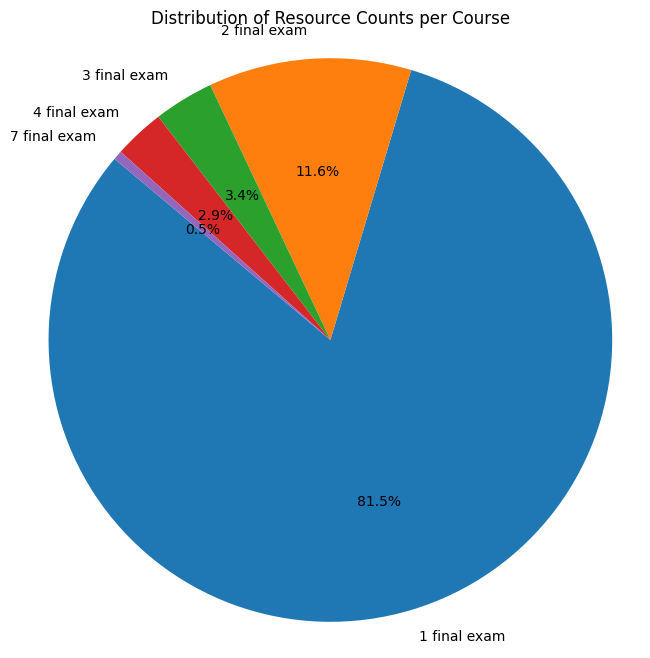

In [ ]:
# Bước 1: Đếm số lượng khóa học theo số lượng bài kiểm tra
counts = grouped['resource_count'].value_counts().sort_index()
# Bước 2: Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=[f"{i} final exam" for i in counts.index],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Resource Counts per Course')
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

In [ ]:
exam_related.to_csv("course_exam.csv", index = False)

In [ ]:
grouped_new = ex_exam_related.groupby('id')['resource_id'].apply(list).reset_index(name='exam_resources')
grouped_new

,id,exam_resources
0,C_1073350,"[Ex_1650729, Ex_1650730]"
1,C_1714443,[Ex_3625291]
2,C_1718815,[Ex_4974697]
3,C_1721804,"[Ex_3742687, Ex_3742688]"
4,C_1724283,[Ex_3800298]
...,...,...
373,C_948114,"[Ex_1467099, Ex_1573116, Ex_1573117]"
374,C_948123,[Ex_1467720]
375,C_948128,"[Ex_6318041, Ex_6318076]"
376,C_948140,[Ex_1469502]


In [ ]:
grouped_new.to_csv('final_course_exam.csv', index = True)